# Digit recognizer

## Used libraries

• tensorflow — TensorFlow is an open source software library for high performance numerical computation.
• keras — TensorFlow Keras is an implementation of the Keras API that uses TensorFlow as a backend.

## Used classes
• Sequential - model that groups linear set of layers to `tf.keras.Model`.
• Dense - просто наш обычный плотно связанный слой NN.
• Dropout - randomly sets input values to 0 with the speed that helps to prevent overtraining. Input values not set to 0 are scaled by 1/(1 - speed) so that the sum of all input values remains the same.

In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow import keras

## Model creation

In [3]:
def mnist_make_model(image_w: int, image_h: int) -> Sequential:
    model = Sequential()
    model.add(Dense(1024, activation="relu", input_shape=(image_w * image_h,)))
    model.add(Dropout(0.2))     # rate 0.2 - set 20% of inputs to zero
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=RMSprop(), metrics=["accuracy"])
    return model

## Neural network training

In [4]:
def mnist_mlp_train(model: Sequential) -> tuple:
    (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

    image_size = x_train.shape[1]
    train_data = x_train.reshape(x_train.shape[0], image_size * image_size)
    test_data = x_test.reshape(x_test.shape[0], image_size * image_size)

    train_data = train_data.astype("float32")
    test_data = test_data.astype("float32")
    train_data /= 255.0
    test_data /= 255.0

    # encode the labels - we have 10 output classes
    # 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0]
    num_classes = 10
    train_labels_cat = keras.utils.to_categorical(y_train, num_classes)
    test_labels_cat = keras.utils.to_categorical(y_test, num_classes)

    print("Training the network...")

    # Start training the network
    history = model.fit(
        x=train_data,
        y=train_labels_cat,
        epochs=21,
        batch_size=100,
        verbose=1,
        validation_data=(test_data, test_labels_cat),
    )

    return model, history

## Model creation

In [11]:
model = mnist_make_model(image_w=28, image_h=28)
model, history = mnist_mlp_train(model)
model.save(os.path.join("models", "mlp_digits_28x28.h5"))

Training the network...
Epoch 1/21
600/600 [==============================] - 25s 41ms/step - loss: 0.2211 - accuracy: 0.9322 - val_loss: 0.0956 - val_accuracy: 0.9700
Epoch 2/21
600/600 [==============================] - 26s 44ms/step - loss: 0.0983 - accuracy: 0.9716 - val_loss: 0.0900 - val_accuracy: 0.9757
Epoch 3/21
600/600 [==============================] - 25s 41ms/step - loss: 0.0751 - accuracy: 0.9782 - val_loss: 0.0750 - val_accuracy: 0.9796
Epoch 4/21
600/600 [==============================] - 24s 40ms/step - loss: 0.0661 - accuracy: 0.9826 - val_loss: 0.0948 - val_accuracy: 0.9790
Epoch 5/21
600/600 [==============================] - 25s 41ms/step - loss: 0.0581 - accuracy: 0.9845 - val_loss: 0.0866 - val_accuracy: 0.9800
Epoch 6/21
600/600 [==============================] - 30s 50ms/step - loss: 0.0520 - accuracy: 0.9860 - val_loss: 0.1078 - val_accuracy: 0.9785
Epoch 7/21
600/600 [==============================] - 26s 43ms/step - loss: 0.0502 - accuracy: 0.9880 - val_loss

## Building training graph

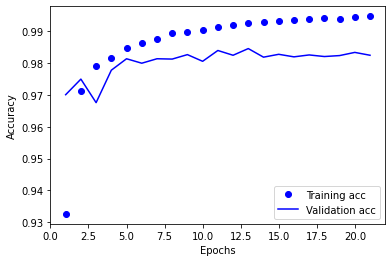

In [6]:
history_dict = history.history
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Evaluate the quality of model training on test data

In [7]:
print("Accuracy on test data: %.2f%%" % (val_acc_values[-11] * 100))

Accuracy on test data: 98.40%


## Digit prediction

In [8]:
def mlp_digits_predict(model: Sequential, image_file: str) -> np.int64:
    image_size = 28
    img = keras.preprocessing.image.load_img(image_file, target_size=(image_size, image_size), color_mode="grayscale")
    plt.imshow(img)
    plt.show()

    img_arr = np.expand_dims(img, axis=0)
    img_arr = 1 - img_arr / 255.0
    img_arr = img_arr.reshape((1, image_size * image_size))
    predict_classes = model.predict([img_arr])
    result = np.argmax(predict_classes, axis=1)
    return result[0]

## Loading the model

In [9]:
model = tf.keras.models.load_model(os.path.join("models", "mlp_digits_28x28.h5"))

## Распознание цифр

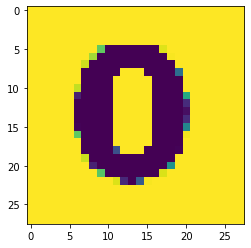

1/1 [==============================] - 0s 112ms/step
Result for 0: 0


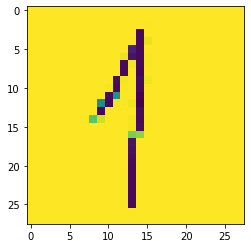

1/1 [==============================] - 0s 28ms/step
Result for 1: 1


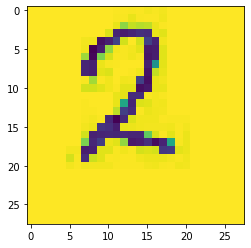

1/1 [==============================] - 0s 28ms/step
Result for 2: 2


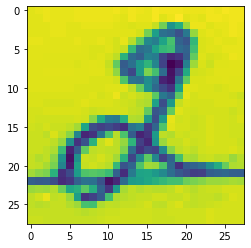

1/1 [==============================] - 0s 28ms/step
Result for 2_: 2


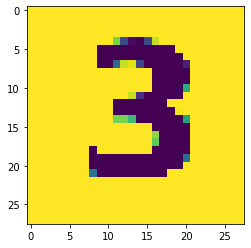

1/1 [==============================] - 0s 24ms/step
Result for 3: 3


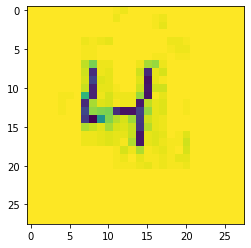

1/1 [==============================] - 0s 23ms/step
Result for 4: 4


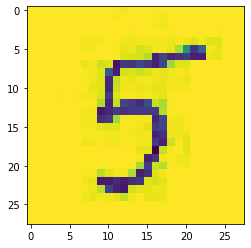

1/1 [==============================] - 0s 25ms/step
Result for 5: 5


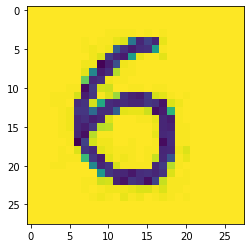

1/1 [==============================] - 0s 25ms/step
Result for 6: 5


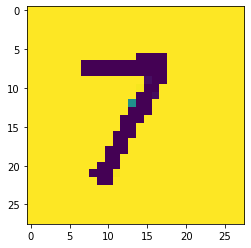

1/1 [==============================] - 0s 28ms/step
Result for 7: 7


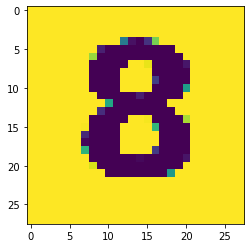

1/1 [==============================] - 0s 25ms/step
Result for 8: 8


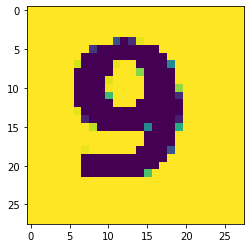

1/1 [==============================] - 0s 27ms/step
Result for 9: 9


In [10]:
images_list = sorted(os.listdir("source"))
for image_name in images_list:
    name, extension = image_name.split('.')
    print(f"Result for {name}: {mlp_digits_predict(model, os.path.join('source', image_name))}")